In [1]:
import numpy as np
import derp
from time import sleep

# Testing Focus, Rotation Stages

In [2]:
derp.print_connected_devices()

[('45452684', 'APT Stepper Motor Controller'), ('55344714', 'Kinesis K10CR1 Rotary Stage'), ('55346494', 'Kinesis K10CR1 Rotary Stage')]


In [3]:
fstg = derp.FocusStage()

c:\Users\EPL User\.conda\envs\pylablib_env\Lib\site-packages\pylablib\devices\Thorlabs\kinesis.py:1319: UserWarning: can't recognize motor model LTS150C; setting all scales to internal units
  warnings.warn("can't recognize motor model {}; setting all scales to internal units".format(self._model))


In [4]:
psgstg = derp.PSGRotationStage()
psastg = derp.PSARotationStage()

In [5]:
psgstg.step(10)

In [6]:
psastg.step(10)

In [7]:
fstg.step(500000)

In [4]:
fstg.close()
psgstg.close()
psastg.close()

NameError: name 'psgstg' is not defined

# Testing CRED2 Camera

In [2]:
cam = derp.CRED2(-39, fps=10, tint=1000)

Updating...
Sensor Temperature: -37.88C
Motherboard Temperature: 38.25C
Frontend Temperature: 42.0C
Powerboard Temperature: 43.75C
Peltier Temperature: 16.19C
Heatsink Temperature: 38.5C
***********************
Sensor Temperature: -37.88C
Motherboard Temperature: 38.0C
Frontend Temperature: 42.0C
Powerboard Temperature: 44.0C
Peltier Temperature: 16.19C
Heatsink Temperature: 38.48C
***********************
Sensor Temperature: -37.88C
Motherboard Temperature: 38.0C
Frontend Temperature: 42.0C
Powerboard Temperature: 44.0C
Peltier Temperature: 16.19C
Heatsink Temperature: 38.48C
***********************
Sensor Temperature: -35.59C
Motherboard Temperature: 38.25C
Frontend Temperature: 42.0C
Powerboard Temperature: 44.0C
Peltier Temperature: 15.04C
Heatsink Temperature: 38.69C
***********************
Sensor Temperature: -37.82C
Motherboard Temperature: 38.25C
Frontend Temperature: 42.0C
Powerboard Temperature: 44.25C
Peltier Temperature: 13.76C
Heatsink Temperature: 39.24C
******************

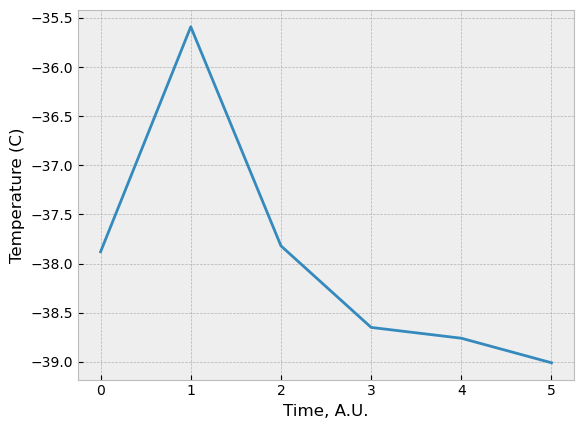

In [3]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

plt.figure()
plt.ylabel('Temperature (C)')
plt.xlabel('Time, A.U.')
plt.plot(cam.temperature_change, label='Temperature Change')
plt.show()

In [4]:
im = cam.take_image()

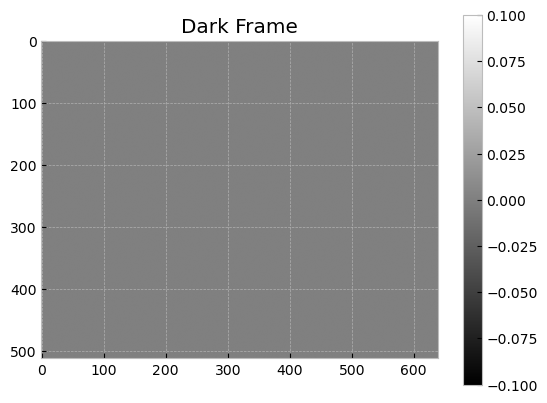

In [8]:
plt.figure()
plt.title('Dark Frame')
plt.imshow(im[0], cmap='gray')
plt.colorbar()
plt.show()

In [9]:
im[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
cam.close()

NameError: name 'cam' is not defined

In [44]:
cam.tint = 50 # ms

In [56]:
im_light_50ms = cam.take_image()[0]
im_light_50ms.dtype

dtype('float64')

In [17]:
import FliSdk_V2 as sdk

im = sdk.GetRawImageAsNumpyArray(cam.context,0)

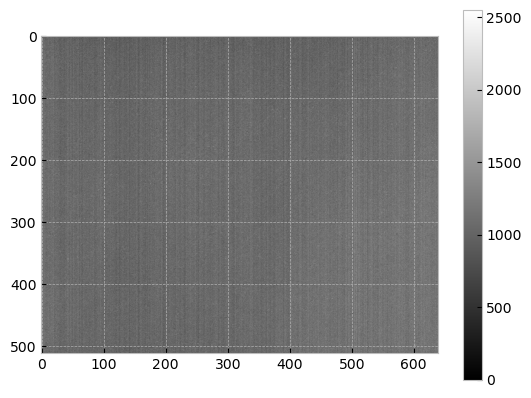

In [22]:
plt.imshow(im, cmap='gray', vmax=2550)
plt.colorbar()

In [32]:
im_light = sdk.GetRawImageAsNumpyArray(cam.context,0)

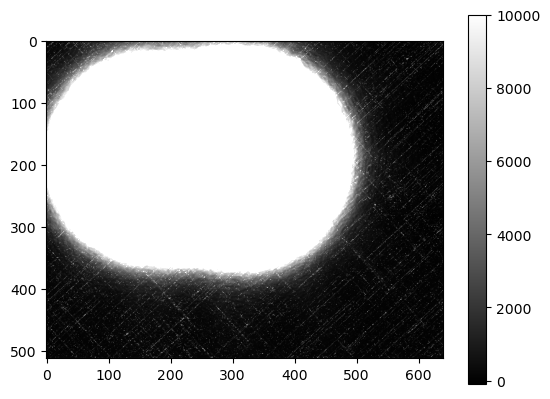

In [57]:
plt.style.use('default')
plt.imshow(im_light_50ms - im.astype(np.float64), cmap='gray',vmin=-100, vmax=10000)
plt.colorbar()

In [36]:
im.dtype

dtype('uint16')

In [37]:
im_light.dtype

dtype('uint16')